# Лабораторная работа №1
# Градиентный спуск и его модификации

###Поставновка задачи
* Выбрать тестовые функции оптимизации (2 шт)
* Запрограммировать собственнуб реализацию классического градиентного спуска
* Запрограммировать пайлайн тестирования алгоритма оптимизации
  * Визуализации функции и точки оптимума
  * Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
  * Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
* Запрограммировать метод вычисления градиента
  * Передача функции градиента от пользователя
  * Символьное вычисление градиента (например с помощью sympy) (на доп балл)
  * Численная аппроксимация градиента (на доп балл)
* Запрограммировать одну моментную модификацию и протестировать ее
* Запрограммировать одну адаптивную модификацию и протестировать ее
* Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их
* Will be unclocked afetr Lecture №5

## Тестовые функции опимизации (2шт)
### Функция Матьяса
$f(x,y) = 0.26(x^2 + y^2)-0.48xy$

### Функция Леви №13
$f(x,y)=sin^2(3\pi x)+(x-1)^2(1+sin^2(3\pi y) + (y-1)^2(1+sin^2(2\pi y)$


#Импортирование необходимых библиотек

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as la
from datetime import datetime
from sympy.abc import x, y
from sympy import *


Функция Матьяса

In [ ]:
# Ищем частные производные функции Матьяса
f = 0.26*(x*x +y*y)-0.48*x*y
print(diff(f,x))
print(diff(f,y))

0.52*x - 0.48*y
-0.48*x + 0.52*y


Функция Леви № 13

In [ ]:
# Ищем частные производные функции Леви № 13
f =  sin(3*pi*x)*sin(3*pi*x) + (x-1)*(x-1) * (1+sin(3*pi*y)*sin(3*pi*y)) + (y-1)*(y-1) * (1+sin(2*pi*y)*sin(2*pi*y))
print(diff(f,x))
print(diff(f,y))

(2*x - 2)*(sin(3*pi*y)**2 + 1) + 6*pi*sin(3*pi*x)*cos(3*pi*x)
6*pi*(x - 1)**2*sin(3*pi*y)*cos(3*pi*y) + 4*pi*(y - 1)**2*sin(2*pi*y)*cos(2*pi*y) + (2*y - 2)*(sin(2*pi*y)**2 + 1)


### Задаем функцию Матьяса

In [ ]:
class Matiac():
  @staticmethod
  def fuction(x):
        return 0.26*(x[0]*x[0] +x[1]*x[1])-0.48*x[0]*x[1]

  @staticmethod
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])

  @staticmethod
  def get_min():
        return np.array([0., 0., 0.])

  @staticmethod
  def gradient(x):
        return np.array([(0.52*x[0] - 0.48*x[1]), (-0.48*x[0] + 0.52*x[1])])

###Задаем функцию Леви № 13

In [ ]:
class Levi():
  @staticmethod
  def fuction(x):
        return np.sin(3 * np.pi * x[0])**2 + (x[0] - 1)**2 * (1 + np.sin(3 * np.pi * x[1])**2) + (x[1] - 1)**2 * (1 + np.sin(2 * np.pi * x[1])**2)

  @staticmethod
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])

  @staticmethod
  def get_min():
        return np.array([1., 1., 0.])

  @staticmethod
  def gradient(x):
        return np.array([((2 * x[0] - 2) * (np.sin(3 * np.pi * x[1])**2 + 1) + 6 * np.pi * np.sin(3 * np.pi * x[0]) * np.cos(3 * np.pi * x[0])), (6 * np.pi * (x[0] - 1)**2 * np.sin(3 * np.pi * x[1]) * np.cos(3 * np.pi * x[1]) + 4 * np.pi * (x[1] - 1)**2 * np.sin(2 * np.pi * x[1]) * np.cos(2 * np.pi * x[1]) + (2 * x[1] - 2) * (np.sin(2 * np.pi * x[1])**2 + 1))])

##Функция визуализации

In [ ]:
def draw_result(func: callable, bounds: np.array, glob_min: np.array, history: np.array, title: str) -> None:

    """Визуализация градиентного спуска

    Args:
        func (callable): функция искуственного ландшафта
        bounds (np.array): область определения функции
        glob_min (np.array): глобальный минимум функции
        history (np.array): история градиентного спуска
        title (str): содержание заголовка
    """

    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')

    x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
    y = np.linspace(bounds[0, 1], bounds[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = func(np.array([x_grid, y_grid]))

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)
    ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
    ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=100, c="black", lw=2, ec='black', marker = 'o')
    ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=150, c="white", lw=2, ec='black', marker = 'o', alpha = 1)
    ax.scatter3D(glob_min[0], glob_min[1], glob_min[2], s=200, c="Green", ec='Green', marker = 'o', alpha = 0.7)

    np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
    print(f"Начальная точка:\t{history[0]}")
    np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
    print(f"Найденный минимум:\t{history[-1]}")
    print(f"Глобальный минимум:\t{glob_min}")
    print(f"Погрешность:\t{(glob_min[2]-history[-1][2])}")
    print(f"Кол-во итераций:\t{len(history)}")

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

##Дефолтный Градиентный спуск

In [ ]:
def GD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001
    ) -> np.array:

    """Градиентный спуск

    Args:
        func (callable): функция искуственного ландшафта
        grad (callable): градиент функции
        start_params (np.ndarray): стартовый набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    step = 0
    while (step < max_iter and (history[-1][2] - glob_min[2]) > delta):

        # новое значение параметров
        params = params - lr * grad(params)

        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

## Матьяс Классический

Matiac default 
 0:00:00.085134
Начальная точка:	[-10.00 5.00 56.50]
Найденный минимум:	[-1.68e+00 -1.68e+00 1.12e-01]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-0.1123305584654033
Кол-во итераций:	10001
Matiac default 
 0:00:00.083509
Начальная точка:	[-5.00 -1.00 4.36]
Найденный минимум:	[-2.01e+00 -2.01e+00 1.62e-01]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-0.1617558470615792
Кол-во итераций:	10001
Matiac default 
 0:00:00.145687
Начальная точка:	[0.00 7.00 12.74]
Найденный минимум:	[2.35e+00 2.35e+00 2.20e-01]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-0.2201676946103337
Кол-во итераций:	10001
Matiac default 
 0:00:00.097592
Начальная точка:	[5.00 3.00 1.64]
Найденный минимум:	[2.68e+00 2.68e+00 2.88e-01]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-0.28756593786116946
Кол-во итераций:	10001


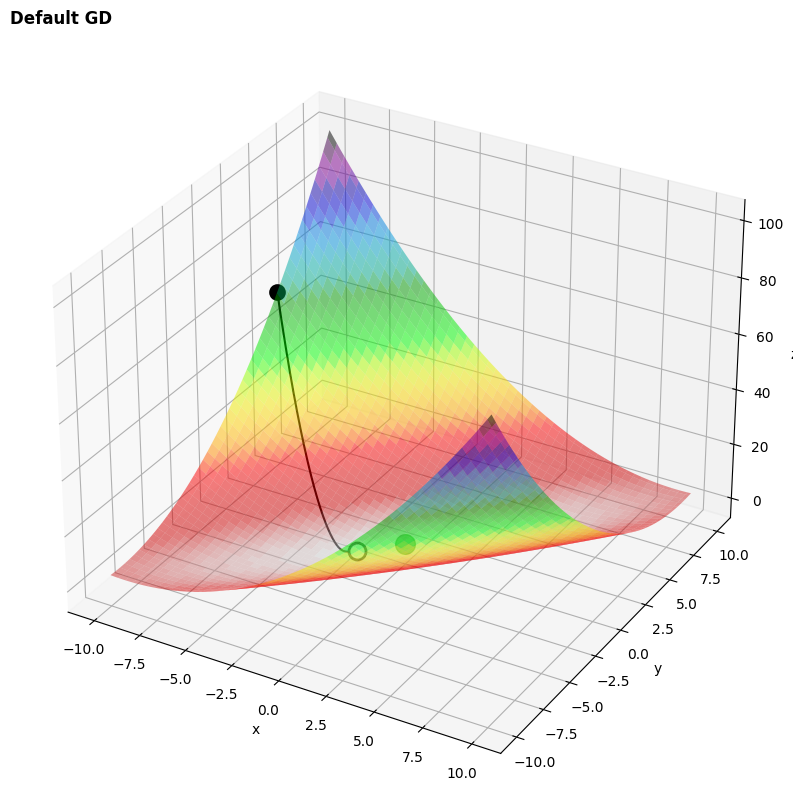

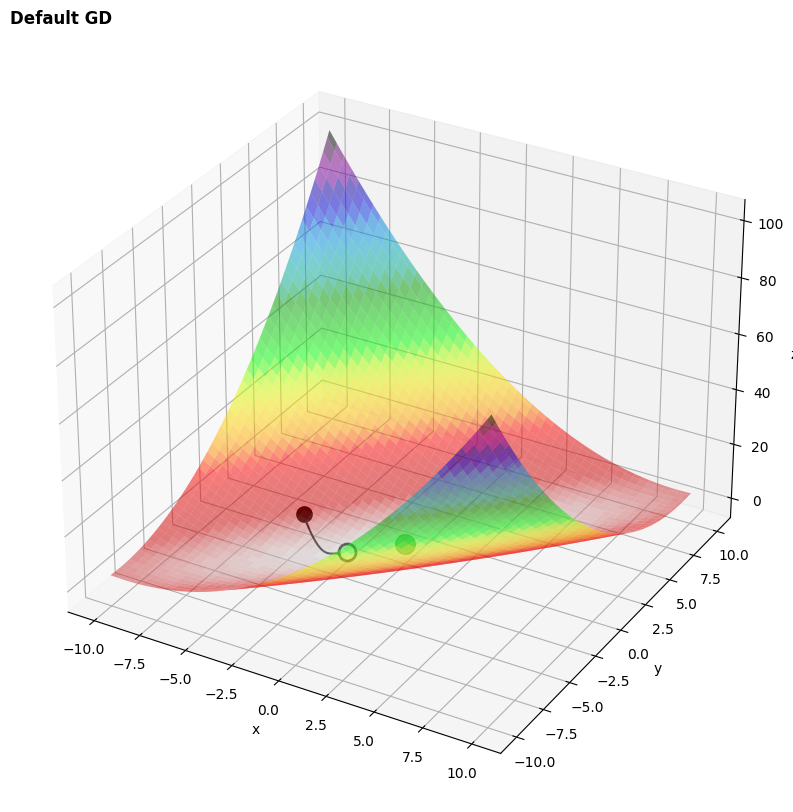

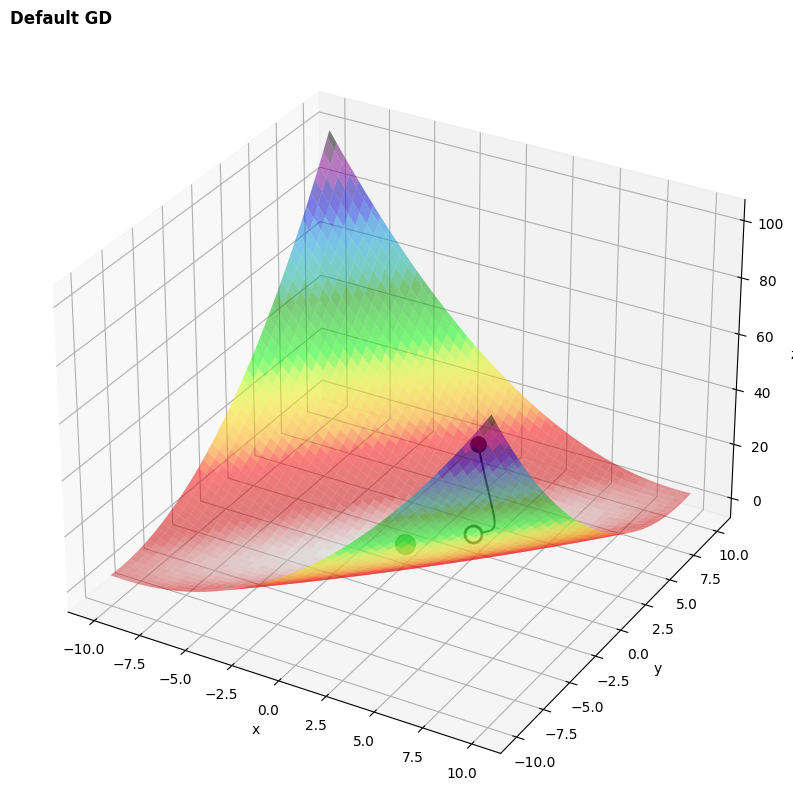

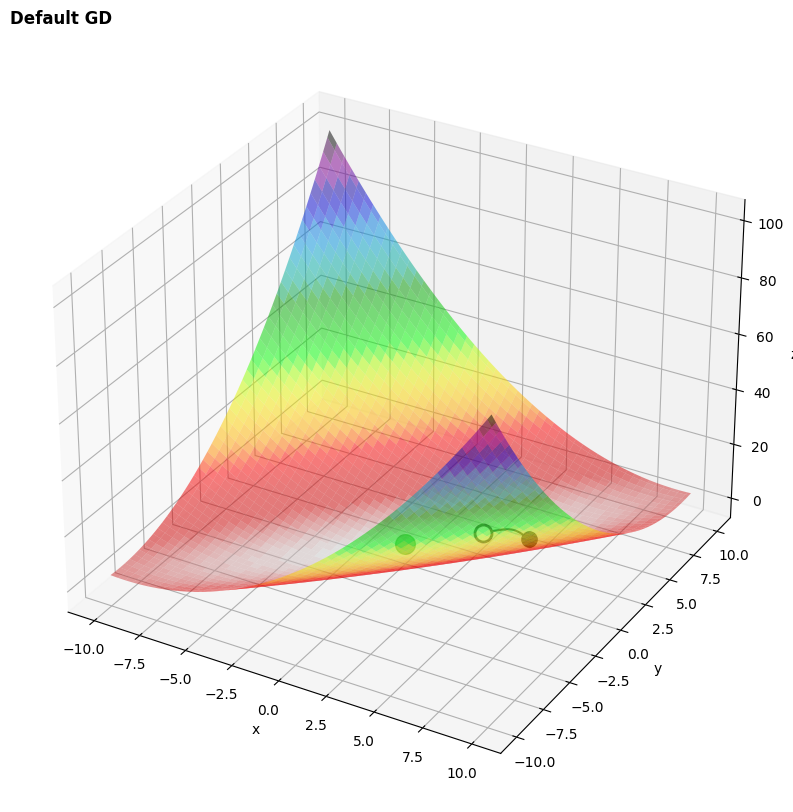

In [ ]:
# Для Матьяс
initial_points = [[-10, 5], [-5, -1], [0, 7], [5, 3]]
for i in initial_points:
  start_time = datetime.now()
  history = GD(Matiac.fuction, Matiac.gradient, i, Matiac.get_min(), max_iter = 10000, lr = 0.001, delta=0.00001)
  print("Matiac default \n", datetime.now() - start_time)
  draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "Default GD")


## Леви Классический

Levi default 
 0:00:00.257202
Начальная точка:	[-9.00 -3.00 116.00]
Найденный минимум:	[-1.61e+00 1.53e+00 1.38e+01]
Глобальный минимум:	[1.00e+00 1.00e+00 0.00e+00]
Погрешность:	-13.787074931767865
Кол-во итераций:	10001
Levi default 
 0:00:00.264670
Начальная точка:	[-5.00 -1.00 40.00]
Найденный минимум:	[-1.29e+00 1.16e+00 1.07e+01]
Глобальный минимум:	[1.00e+00 1.00e+00 0.00e+00]
Погрешность:	-10.681408033712982
Кол-во итераций:	10001
Levi default 
 0:00:00.251023
Начальная точка:	[1.00 7.00 36.00]
Найденный минимум:	[1.00e+00 3.54e+00 6.96e+00]
Глобальный минимум:	[1.00e+00 1.00e+00 0.00e+00]
Погрешность:	-6.955052244712023
Кол-во итераций:	10001
Levi default 
 0:00:00.366236
Начальная точка:	[5.00 3.00 20.00]
Найденный минимум:	[3.63e+00 -1.28e+00 1.89e+01]
Глобальный минимум:	[1.00e+00 1.00e+00 0.00e+00]
Погрешность:	-18.943672735984656
Кол-во итераций:	10001


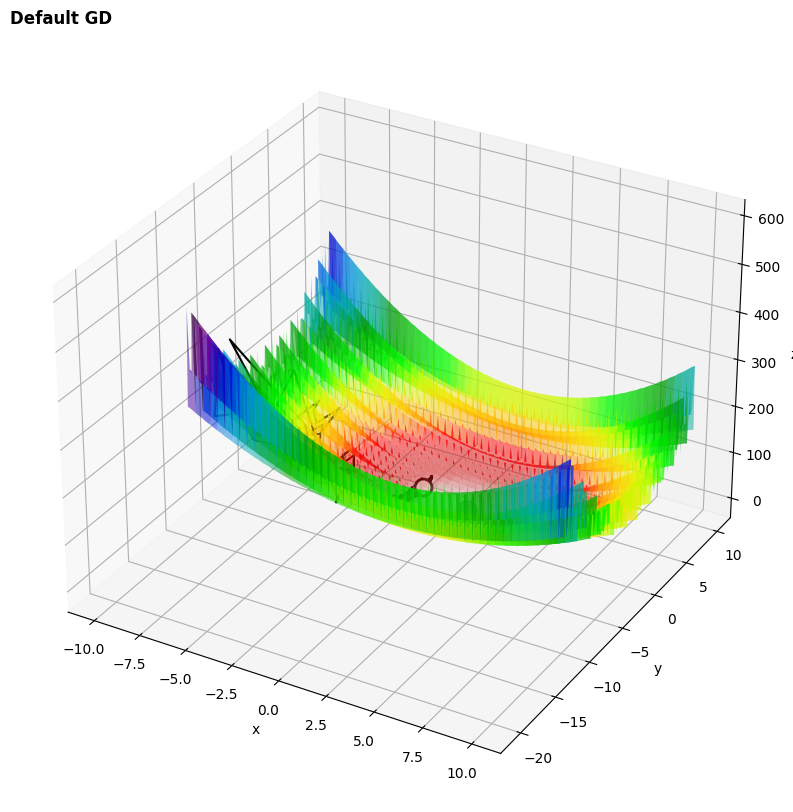

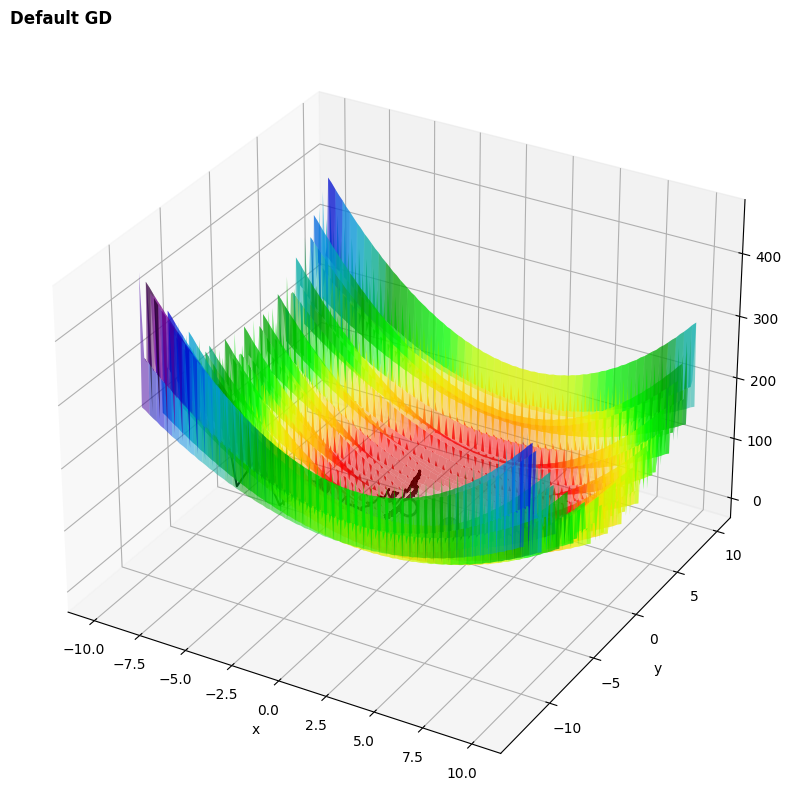

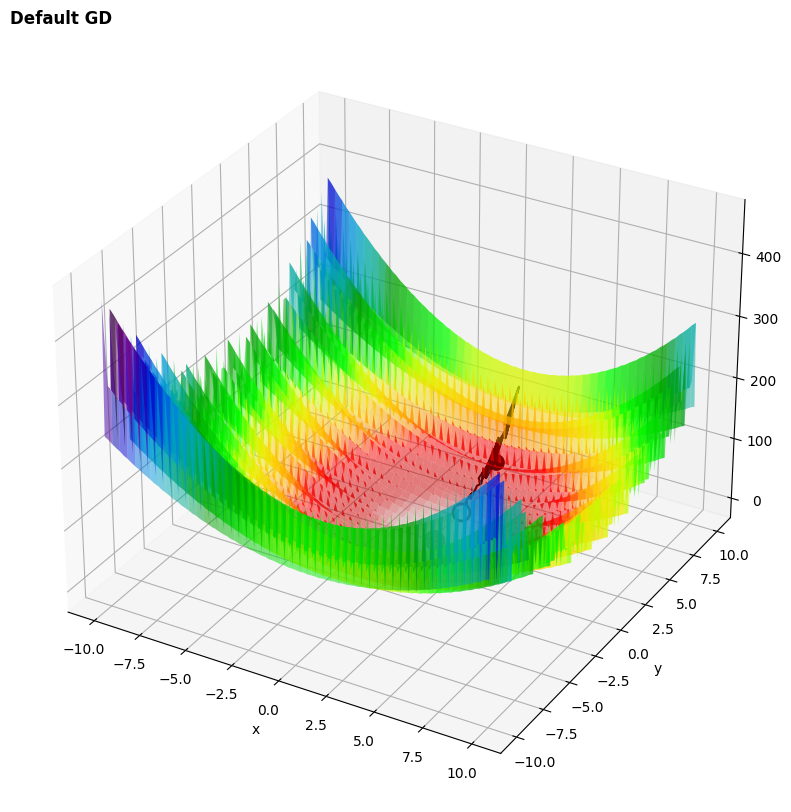

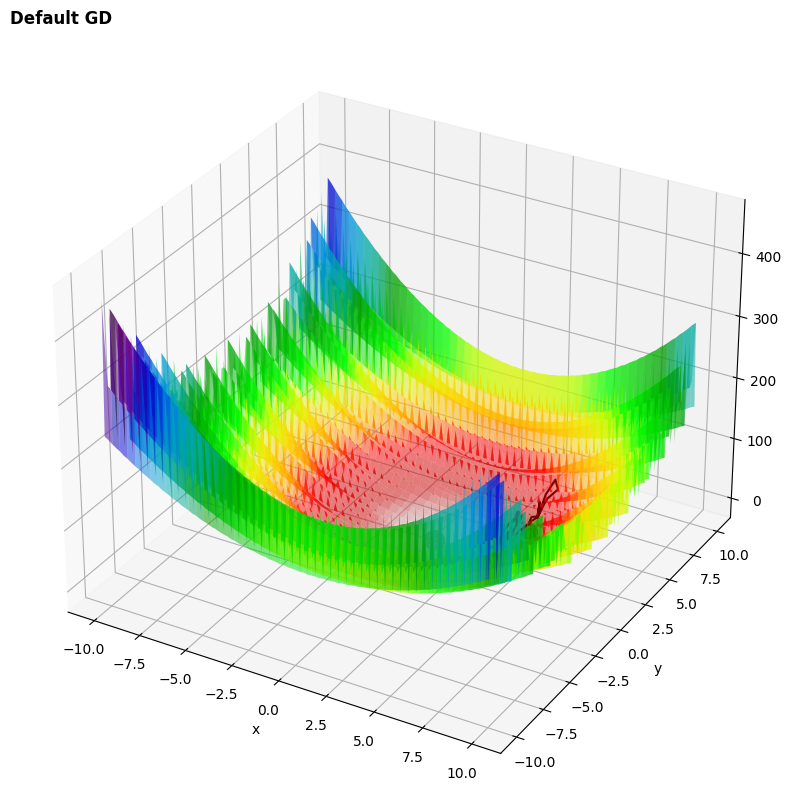

In [ ]:
# Для Леви
initial_points = [[-9, -3], [-5, -1], [1, 7], [5, 3]]
for i in initial_points:
  start_time = datetime.now()
  history = GD(Levi.fuction, Levi.gradient, i, Levi.get_min(), max_iter = 10000, lr = 0.005)
  print("Levi default \n", datetime.now() - start_time)
  draw_result(Levi.fuction, Levi.get_bounds(), Levi.get_min(), history, "Default GD")

## Моментный Градиентный спуск

In [ ]:
def MGD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001, beta: float = 0.5
    ) -> np.array:

    """Градиентный спуск с моментной модификацией

    Args:
        func (callable): функция искуственного ландшафта
        grad (callable): градиент функции
        start_params (np.ndarray): начальный набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.
        beta (float, optional): Коэффициент энертности. Defaults to 0.5.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params_prev = start_params.copy()
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):

        # новое значение параметров
        params_new = params - lr * grad(params) + beta * (params - params_prev)
        params_prev = params
        params = params_new

        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

## Моментный градиентный спуск - Матьяс

Matiac inertial sgd
 0:00:00.275109
Начальная точка:	[-10.00 5.00 56.50]
Найденный минимум:	[-1.41e+00 -1.41e+00 7.97e-02]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-0.07972570982278493
Кол-во итераций:	10001


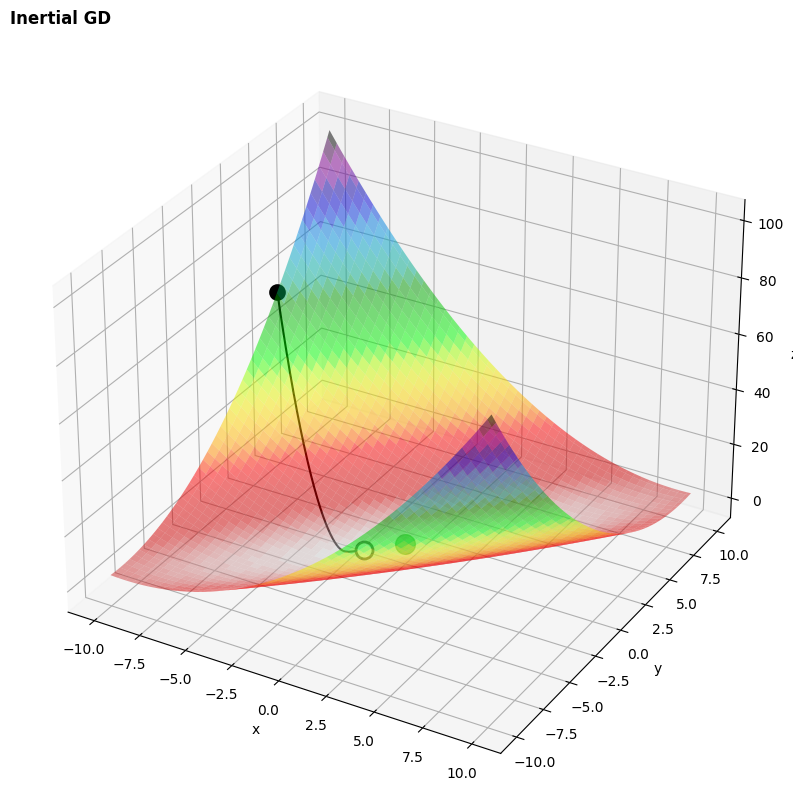

In [ ]:
# Для Матьяса
start_time = datetime.now()
history = MGD(Matiac.fuction, Matiac.gradient, np.array([-10, 5]), Matiac.get_min(), max_iter = 10000, lr = 0.001, delta=0.00001, beta = 0.3)
print("Matiac inertial sgd\n", datetime.now() - start_time)
draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "Inertial GD")

## Моментный Градиентный спуск - Леви №13

Levi inertial sgd
 0:00:00.971853
Начальная точка:	[5.00 3.00 20.00]
Найденный минимум:	[6.70e-01 2.99e+00 4.09e+00]
Глобальный минимум:	[1.00e+00 1.00e+00 0.00e+00]
Погрешность:	-4.085823934886065
Кол-во итераций:	10001


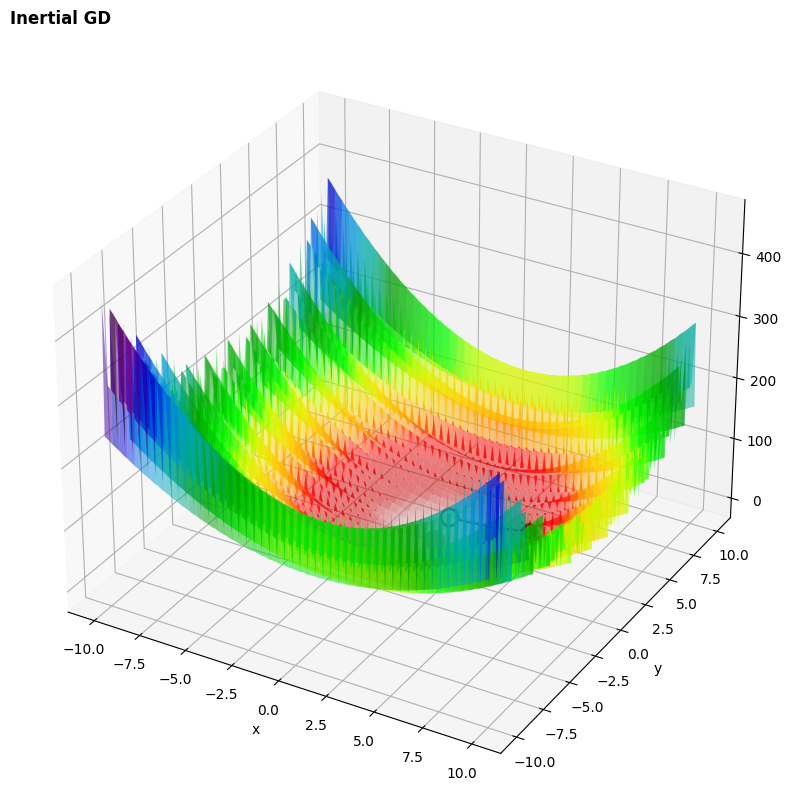

In [ ]:
# Для Леви
start_time = datetime.now()
history = MGD(Levi.fuction, Levi.gradient, np.array([5, 3]), Levi.get_min(), max_iter = 10000, lr = 0.001, beta = 0.95)
print("Levi inertial sgd\n", datetime.now() - start_time)
draw_result(Levi.fuction, Levi.get_bounds(), Levi.get_min(), history, "Inertial GD")

## Адаптивный Градиентный спуск

In [ ]:
def AGD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, max_iter: int = 1000,
    lr: float = 0.1, b1: float = 0.9, b2: float = 0.999, e: float = 10e-8, delta: float = 0.001
    ) -> np.array:

    """Адаптивный градиентный спуск: Adam

    Args:
        func (callable): функция искуственного ландшавта
        grad (callable): градиент функции
        start_params (np.ndarray): стартовый набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): Ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        b1 (float, optional): параметр beta1. Defaults to 0.6.
        b2 (float, optional): параметр beta2. Defaults to 0.999.
        e (float, optional): "бесконечно" малое число. Defaults to 10e-8.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    # инициализация моментов
    m = np.array([0, 0])
    v = np.array([0, 0])

    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):

        # считаем моменты
        m = b1 * m + (1 - b1) * grad(params)
        v = b2 * v + (1 - b2) * grad(params) ** 2

        # новое значение параметров
        params = params - lr * m / (np.sqrt(v) + e)

        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

## Адаптивный градиентный спуск - Матьяс

Matiac AGM
 0:00:00.050044
Начальная точка:	[-10.00 5.00 56.50]
Найденный минимум:	[-7.04e-04 -7.03e-04 1.98e-08]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-1.9784698714405353e-08
Кол-во итераций:	903


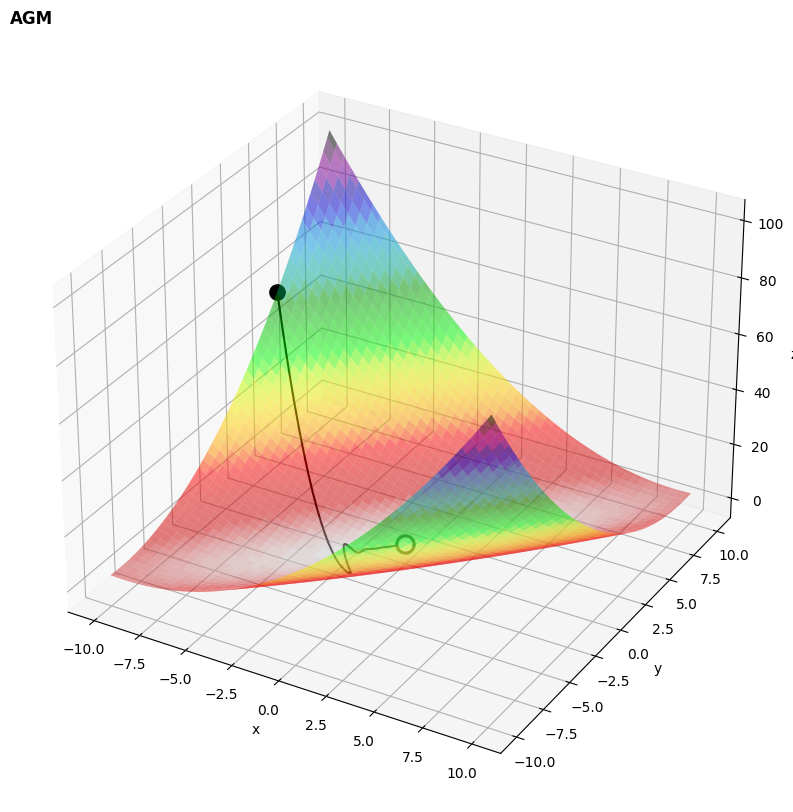

In [ ]:
# Для Матьяса
start_time = datetime.now()
history = AGD(Matiac.fuction, Matiac.gradient, np.array([-10, 5]), Matiac.get_min(), max_iter = 10000, lr = 0.1)
print("Matiac AGM\n", datetime.now() - start_time)
draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "AGM")

## Адаптивный Градиентный спуск - Леви №13

MakKormik AGM
 0:00:00.814658
Начальная точка:	[5.00 3.00 20.00]
Найденный минимум:	[4.95e+00 3.00e+00 1.98e+01]
Глобальный минимум:	[1.00e+00 1.00e+00 0.00e+00]
Погрешность:	-19.805650423879264
Кол-во итераций:	10001


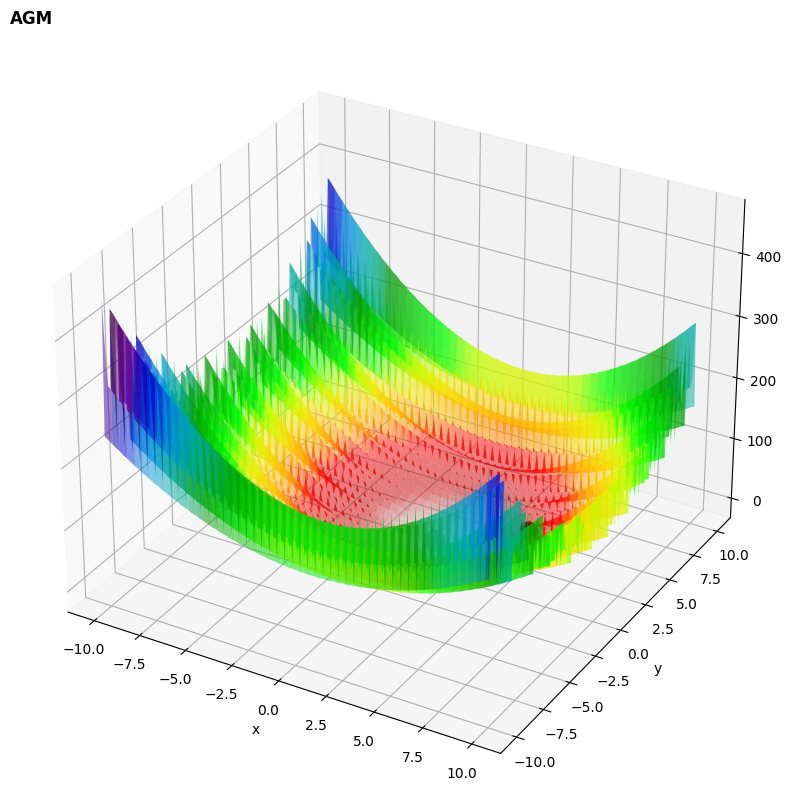

In [ ]:
# Для Леви
start_time = datetime.now()
history = AGD(Levi.fuction, Levi.gradient, np.array([5, 3]), Levi.get_min(), max_iter = 10000, lr = 0.001)
print("MakKormik AGM\n", datetime.now() - start_time)
draw_result(Levi.fuction, Levi.get_bounds(), Levi.get_min(), history, "AGM")

## Задание функции пользователем

Введите выражение, переменные задавайте в виде x, y: x + y**3 - 2*x*y
Your function default sgd
 0:00:00.353609
[5.39e+00 2.99e+00 -1.05e-01]


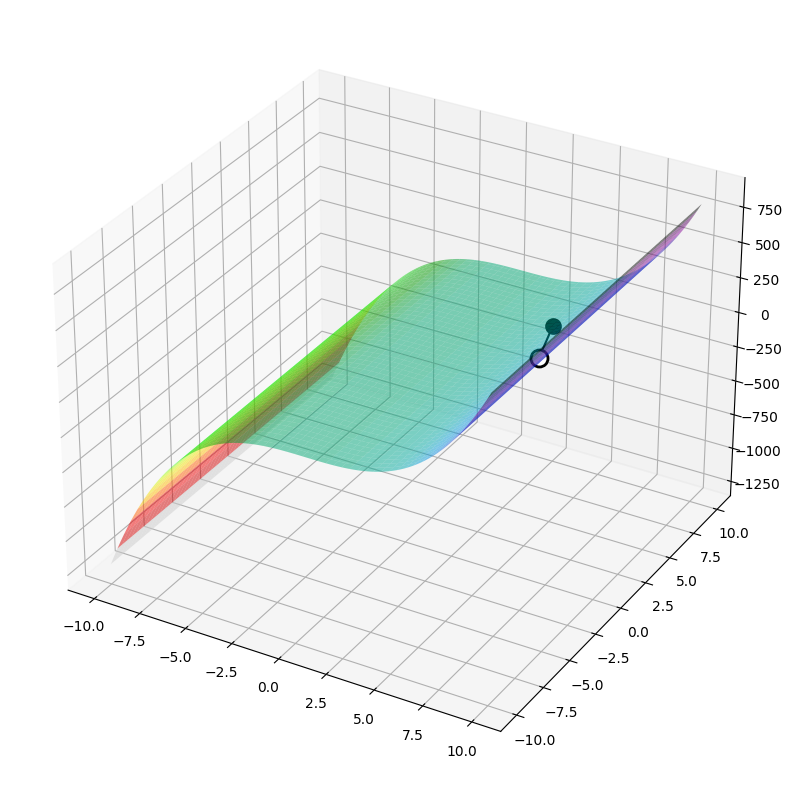

In [ ]:

# Define symbols and trigo expression
x, y = symbols('x y')
global Func
expn = input("Введите выражение, переменные задавайте в виде x, y: ")
Func = expn
# Use sympy.sympify() method
gfg = sympify(expn)
def function(fx):
  x, y = symbols('x y')
  gfg = sympify(Func)
  substitutions = {x: fx[0], y: fx[1]}
  return float(gfg.subs(substitutions))


def get_bounds(xy_min):
  return np.array([[xy_min[0] - 10, xy_min[1] - 10], [xy_min[0] + 10, xy_min[1] + 10]])


def get_min():
      return np.array([0., 0., 0.])


def gradient(xy):
  x, y = symbols('x y')
  gfg = sympify(Func)
  substitutions = {x: xy[0], y: xy[1]}
  diffX = diff(gfg, x)
  diffY = diff(gfg, y)
  return np.array([float(diffX.subs(substitutions)), float(diffY.subs(substitutions))])
def draw_result_func(func: callable, history: np.array) -> None:
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes(projection = '3d')
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  x_grid, y_grid = np.meshgrid(x,y)
  z = []
  for i in range(len(x)):
    a = func(np.array([x[i], y[i]]))
    z.append(a)

  z_grid=np.asarray(np.meshgrid(z))
  ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)
  ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
  ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=100, c="black", lw=2, ec='black', marker = 'o')
  ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=150, c="white", lw=2, ec='black', marker = 'o', alpha = 1)

start_time = datetime.now()
history = my_GD(function, gradient, np.array([5,5]), get_min(), max_iter = 10000, lr = 0.001)
print("Your function default sgd\n", datetime.now() - start_time)
print(history[-1])
draw_result_func(function, history)

## Метод темпа обучения

In [ ]:
def GD_LR(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, lr: [],
    max_iter: int = 1000, delta: float = 0.001
    ) -> np.array:

    """Градиентный спуск

    Args:
        func (callable): функция искуственного ландшафта
        grad (callable): градиент функции
        start_params (np.ndarray): стартовый набор параметров
        glob_min (np.ndarray): глобальный минимум рассматриваемой функции
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: история градиентного спуска
    """

    # начальный набор параметров
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    step = 0
    while (step < max_iter and (history[-1][2] - glob_min[2]) > delta):

        # новое значение параметров
        params = params - lr[step] * grad(params)

        # сохраняем результат
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

In [ ]:
def exponential_decay(initial_lr, decay_rate, iteration):
  lr = []
  for i in range(iteration):
    # Update learning rate exponentially based on the decay rate and epoch
    lr.append(initial_lr * (decay_rate ** i))
  return lr

Matiac inertial 
 0:00:00.086328
Начальная точка:	[-10.00 5.00 56.50]
Найденный минимум:	[-7.50e-01 -7.50e-01 2.25e-02]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Погрешность:	-0.022515088517058246
Кол-во итераций:	10001


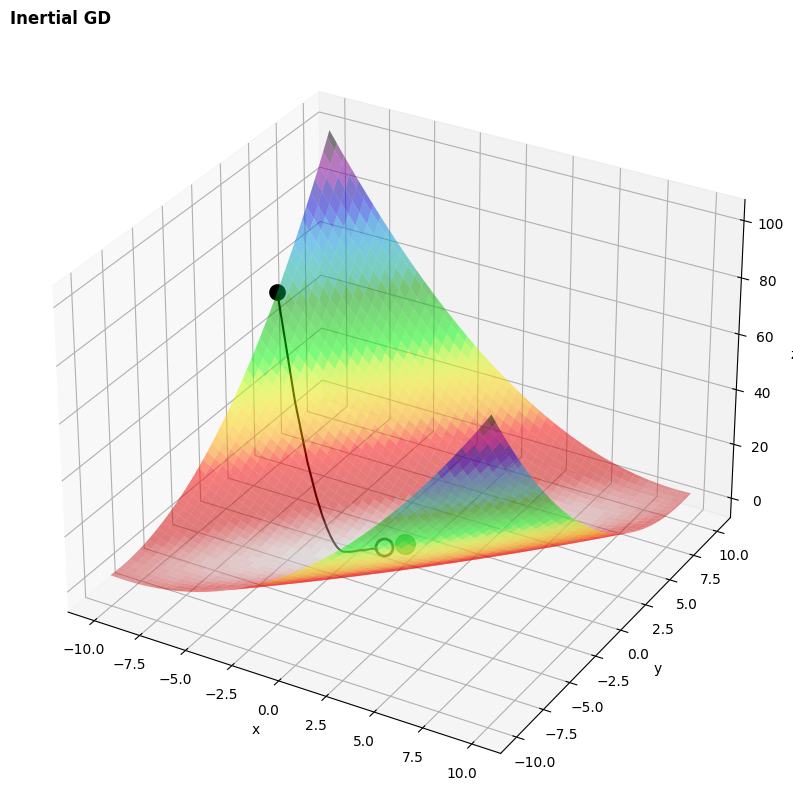

In [ ]:
lr = exponential_decay(0.3, 0.99, 10000)
start_time = datetime.now()
history = GD_LR(Matiac.fuction, Matiac.gradient, np.array([-10, 5]), Matiac.get_min(), lr, max_iter = 10000)
print("Matiac inertial \n", datetime.now() - start_time)
draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "Inertial GD")